# Assiciation Rule Mining

Association rule mining is a data mining technique used to discover interesting relationships, frequent patterns, associations, or causal structures among sets of items in transaction databases, relational databases, and other information repositories. It is widely used in various areas including market basket analysis, web usage mining, bioinformatics, and more.

In market basket analysis, for example, association rule mining is used to find relationships between items that people buy. For instance, if customers often purchase bread and peanut butter together, the store might place these items near each other to increase sales, or use this information for cross-selling and promotions.

The process involves finding sets of items (itemsets) that appear frequently together in transactions, and then forming "if-then" rules that suggest a strong relationship between the presence of certain items.

For example, an association rule in a grocery store might be:
- IF bread AND peanut butter are bought together,
- THEN there's a high chance that jelly is also bought.

This rule would have measures like:
- Support: The proportion of transactions that include all items in the rule. For example, if 100 transactions are recorded, and 5 of them include bread, peanut butter, and jelly, the rule's support is 5%.
- Confidence: The likelihood that jelly is bought if bread and peanut butter are bought. If bread and peanut butter are bought 10 times and 5 of those times jelly is also bought, the confidence is 50%.
- Lift: The increase in the ratio of sale of jelly when bread and peanut butter are sold. If jelly is bought 10 times in 100 transactions (10% chance) and bread and peanut butter are bought 20 times with jelly bought in 5 of those times, the lift is (5/20) / (10/100) = 2.5, meaning jelly is 2.5 times more likely to be bought when bread and peanut butter are bought together compared to its usual sale rate.

The code for association rule mining without the use of specific libraries like mlxtend or scipy can be implemented using pandas and numpy in Python. The image you uploaded outlines the steps and provides pseudocode for implementing the Apriori algorithm, which is a classic algorithm used in association rule mining.

In [1]:
#Import necessary libraries, pandas, numpy and mlxtend
import pandas as pd
import numpy as np
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [6]:
df = pd.read_csv('notebooks/bank-data.csv')
print(df)

          id  age     sex      region    income      Married  children  \
0    ID12101   48  FEMALE  INNER_CITY  17546.00  Not Married         1   
1    ID12102   40    MALE        TOWN  30085.10      Married         3   
2    ID12103   51  FEMALE  INNER_CITY  16575.40      Married         0   
3    ID12104   23  FEMALE        TOWN  20375.40      Married         3   
4    ID12105   57  FEMALE       RURAL  50576.30      Married         0   
..       ...  ...     ...         ...       ...          ...       ...   
595  ID12696   61  FEMALE  INNER_CITY  47025.00  Not Married         2   
596  ID12697   30  FEMALE  INNER_CITY   9672.25      Married         0   
597  ID12698   31  FEMALE        TOWN  15976.30      Married         0   
598  ID12699   29    MALE  INNER_CITY  14711.80      Married         0   
599  ID12700   38    MALE        TOWN  26671.60  Not Married         0   

         car     save_act     current_act     mortgage     pep  
0    No Cars  No Save act  No Current act  No 

In [8]:
#Show the data head
df.head()

,id,age,sex,region,income,Married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,Not Married,1,No Cars,No Save act,No Current act,No Mortgage,PEP
1,ID12102,40,MALE,TOWN,30085.1,Married,3,Cars,No Save act,Current act,Mortgage,No PEP
2,ID12103,51,FEMALE,INNER_CITY,16575.4,Married,0,Cars,Save act,Current act,No Mortgage,No PEP
3,ID12104,23,FEMALE,TOWN,20375.4,Married,3,No Cars,No Save act,Current act,No Mortgage,No PEP
4,ID12105,57,FEMALE,RURAL,50576.3,Married,0,No Cars,Save act,No Current act,No Mortgage,No PEP


In [9]:
#Check the data types in the dataframe
df.dtypes

id              object
age              int64
sex             object
region          object
income         float64
Married         object
children         int64
car             object
save_act        object
current_act     object
mortgage        object
pep             object
dtype: object

In [10]:
#The columns of the dataframe
df.columns

Index(['id', 'age', 'sex', 'region', 'income', 'Married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'pep'],
      dtype='object')

In [11]:
#Check the number of rows and columns
df.shape

(600, 12)

In [12]:
#Check missing values in the dataframe
df.isna()

,id,age,sex,region,income,Married,children,car,save_act,current_act,mortgage,pep
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
595,False,False,False,False,False,False,False,False,False,False,False,False
596,False,False,False,False,False,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False,False,False,False,False,False
598,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#Count total missing values at each column in the dataframe
df.isna().sum()

id             0
age            0
sex            0
region         0
income         0
Married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64

In [14]:
#Drop the column, 'id'.
new_df = df.drop('id',axis = 'columns')

In [17]:
#Data transformation
#TransactionEncoder() function only can handle string type
new_df = new_df.astype(str)

#TransactionEncoder() was designed to convert lists to array
list = new_df.values.tolist()

#Convert the list to one-hot encoded boolean numpy array. 
#Apriori function allows boolean data type only, such as 1 and 0, or FALSE and TRUE.
te = TransactionEncoder()
array_te = te.fit(list).transform(list)

In [18]:
#Check the array
array_te

array([[False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [ True, False, False, ..., False,  True, False],
       ...,
       [ True, False, False, ..., False,  True,  True],
       [ True, False, False, ..., False,  True, False],
       [ True, False, False, ..., False, False,  True]])

In [20]:
#Check the colunms
te.columns_
#Apriori function can handle dataframe only, covert the array to a dataframe
arm_df = pd.DataFrame(array_te, columns = te.columns_)

In [21]:
arm_df

,0,1,10044.1,10072.6,10191.8,10441.9,10629.1,10672.0,10861.0,10953.0,...,No Current act,No Mortgage,No PEP,No Save act,Not Married,PEP,RURAL,SUBURBAN,Save act,TOWN
0,False,True,False,False,False,False,False,False,False,False,...,True,True,False,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
596,True,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
597,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,True
598,True,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


## Data Transformation Solution Evaluation:
- Convert the data into a one-hot encoded format => suitable for use with the Apriori function.
- retuires dataframe of boolean values to represent the presence or absence of an item in a transaction.

## Is the provided data transformation solution good? If not, could you propose a better solution for data transformation?
- Could consider adding a minima threshold to handle large datasets efficiently => filter out low-frequency items before converting to a one-hot encoded array.
- If there's numerical attributes with natural discretization (like age groups or income brackets) => could bin these numerical val into categories before the one-hot encoding.
- For better memory efficiency, especially with large datasets, might want to consider using sparse data structures provided by mlxtend or pandas.
- **Conversion to a bool one-hot encoded format is necessary for the Apriori algorithm to process the data.**

## How are numerical attributes handled in your Project 1 for association rule mining? Could you justify your solution?
- Numerical attributes typically need to be binned/discretized into cat data before used in association rule mining (Apriori algorithm works w/ cat data)
- Transformation sol provided doesm't handle numerical attributes diff from cat ones.
- All data, including numerical values, converted to str then to bool val (could lead to a loss of info)
- Better sol might be to bin numerical attributes into meaningful cat. (exp, incomes could be binned into 'low', 'medium', and 'high' categories. The choice of bins could be based on the data dist or domain knowledge.)
- **Binning numerical attributes would allow inclusion of these attributes in the analysis w/o losing their inherent ordinal/interval nature. Would improve interpretability of rules generated**

**min_support**: a min support threshold, used to filter out itemset that don't occur freq enough.

In [22]:
#Find the frequent itemsets
frequent_itemsets = apriori(arm_df,min_support=0.2,use_colnames =True)

#Check the length of rules
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x: len(x))

#Assume the length is 2 and the min support is >= 0.3
frequent_itemsets[ (frequent_itemsets['length']==2) & 
                  (frequent_itemsets['support']>=0.3)]

,support,itemsets,length
20,0.331667,"(Current act, 0)",2
24,0.300000,"(Married, 0)",2
29,0.366667,"(Current act, Cars)",2
33,0.323333,"(Married, Cars)",2
34,0.323333,"(No Mortgage, Cars)",2
37,0.348333,"(Save act, Cars)",2
38,0.383333,"(FEMALE, Current act)",2
39,0.341667,"(INNER_CITY, Current act)",2
40,0.375000,"(Current act, MALE)",2
41,0.488333,"(Married, Current act)",2


In [24]:
# use confidence to filter out association rules that are nto strong enough
#Assume the min confidence is 0.5
rules_con = association_rules(frequent_itemsets, metric="confidence",min_threshold=0.5)
rules_con

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(Current act),0.438333,0.758333,0.331667,0.756654,0.997785,-0.000736,0.993099,-0.003936
1,(0),(FEMALE),0.438333,0.500000,0.220000,0.501901,1.003802,0.000833,1.003817,0.006744
2,(0),(Married),0.438333,0.660000,0.300000,0.684411,1.036986,0.010700,1.077349,0.063501
3,(0),(No Cars),0.438333,0.506667,0.231667,0.528517,1.043126,0.009578,1.046344,0.073608
4,(0),(No Mortgage),0.438333,0.651667,0.273333,0.623574,0.956891,-0.012314,0.925370,-0.074253
...,...,...,...,...,...,...,...,...,...,...
268,"(Save act, Married, No Mortgage)",(No PEP),0.306667,0.543333,0.200000,0.652174,1.200320,0.033378,1.312917,0.240705
269,"(Save act, No PEP, No Mortgage)",(Married),0.236667,0.660000,0.200000,0.845070,1.280410,0.043800,2.194545,0.286900
270,"(Married, No PEP, No Mortgage)",(Save act),0.285000,0.690000,0.200000,0.701754,1.017035,0.003350,1.039412,0.023427
271,"(Save act, No PEP)","(Married, No Mortgage)",0.391667,0.435000,0.200000,0.510638,1.173881,0.029625,1.154565,0.243493


In [26]:
# Use lift to filter out association rules
#Assume the min lift is 1
rules_lift = association_rules(frequent_itemsets, metric="lift",min_threshold=1)

#Based on min confidence (=0.5), 
#output antecedents, consequents, support, confidence and lift.
result_arm = rules_con[['antecedents','consequents','support','confidence','lift']]
result_arm

,antecedents,consequents,support,confidence,lift
0,(0),(Current act),0.331667,0.756654,0.997785
1,(0),(FEMALE),0.220000,0.501901,1.003802
2,(0),(Married),0.300000,0.684411,1.036986
3,(0),(No Cars),0.231667,0.528517,1.043126
4,(0),(No Mortgage),0.273333,0.623574,0.956891
...,...,...,...,...,...
268,"(Save act, Married, No Mortgage)",(No PEP),0.200000,0.652174,1.200320
269,"(Save act, No PEP, No Mortgage)",(Married),0.200000,0.845070,1.280410
270,"(Married, No PEP, No Mortgage)",(Save act),0.200000,0.701754,1.017035
271,"(Save act, No PEP)","(Married, No Mortgage)",0.200000,0.510638,1.173881


In [28]:
# Filter rules whose confidence >= 0.7
#Find the rules whose confidence >= 0.7
new_result_arm = result_arm[result_arm['confidence']>=0.7]
new_result_arm

,antecedents,consequents,support,confidence,lift
0,(0),(Current act),0.331667,0.756654,0.997785
8,(Cars),(Current act),0.366667,0.743243,0.980101
15,(Cars),(Save act),0.348333,0.706081,1.023306
16,(FEMALE),(Current act),0.383333,0.766667,1.010989
18,(INNER_CITY),(Current act),0.341667,0.762082,1.004943
...,...,...,...,...,...
260,"(Save act, Married, No PEP)",(Current act),0.216667,0.742857,0.979592
262,"(Save act, No PEP, Current act)",(Married),0.216667,0.726257,1.100389
263,"(Married, No PEP, Current act)",(Save act),0.216667,0.734463,1.064440
269,"(Save act, No PEP, No Mortgage)",(Married),0.200000,0.845070,1.280410


# Association Rules Mining without Python Libraries

### Step 1: Calc freq 1-itemsets from provided dummy dataset

In [29]:
import pandas as pd
import numpy as np

# Define func that scans the dataset to find frequent 1-itemsets.

def load_dataset():
    # Normally, load a dataset from a file. For this exp, use dummy data.
    # Each transaction is a list of items bought together.
    return [['milk', 'bread', 'butter'],
            ['bread', 'butter'],
            ['milk', 'bread'],
            ['milk'],
            ['bread', 'butter'],
            ['milk', 'bread', 'butter', 'cheese'],
            ['bread', 'cheese'],
            ['butter', 'cheese'],
            ['bread', 'butter', 'cheese']]

def create_itemsets(transactions):
    itemsets = {}
    for transaction in transactions:
        for item in transaction:
            if item not in itemsets:
                itemsets[item] = 1
            else:
                itemsets[item] += 1
    return itemsets

def get_frequent_itemsets(itemsets, min_support, total_transactions):
    frequent_itemsets = {}
    for itemset, count in itemsets.items():
        if count / total_transactions >= min_support:
            frequent_itemsets[itemset] = count
    return frequent_itemsets

# Load the dataset (list of transactions)
transactions = load_dataset()

# Count the occurrence of each item in all transactions (1-itemsets)
itemsets = create_itemsets(transactions)

# Define a minimum support threshold (for the sake of example, we use a relative frequency as support)
min_support = 0.5  # 50% of transactions

# Calculate frequent 1-itemsets
frequent_itemsets = get_frequent_itemsets(itemsets, min_support, len(transactions))

frequent_itemsets


{'bread': 7, 'butter': 6}

### Step 2 - Candidate itemsets

#### Support
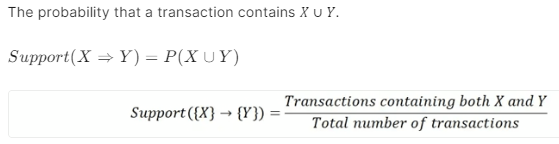

In [35]:
def join_step(frequent_itemsets, k):
    """
    Join step of Apriori algorithm. Given a list of frequent (k-1)-itemsets,
    it will return a set of candidate k-itemsets.
    """
    candidates = set()
    # Join pairs of itemsets if they have k-2 items in common
    print("going into frequent_itemsets loop")
    for i in range(len(frequent_itemsets)):
        for j in range(i+1, len(frequent_itemsets)):
            # Perform the union of two itemsets if the first k-2 items are equal and the last items are different
            union = frequent_itemsets[i] | frequent_itemsets[j]
            print(i, union)
            if len(union) == k:
                candidates.add(frozenset(union))
    return candidates

def prune_step(candidates, previous_frequent_itemsets, k):
    """
    Prune step of Apriori algorithm. Given a set of candidate k-itemsets and a list of frequent (k-1)-itemsets,
    it will return a set of candidate k-itemsets where all (k-1)-subsets are frequent.
    """
    print("going into candidates loop")
    pruned_candidates = set()
    for candidate in candidates:
        all_subsets_are_frequent = True
        # Generate all (k-1)-subsets of the candidate and check if they are all frequent
        for subset in map(frozenset, itertools.combinations(candidate, k-1)):
            if subset not in previous_frequent_itemsets:
                all_subsets_are_frequent = False
                break
        if all_subsets_are_frequent:
            pruned_candidates.add(candidate)
        print(pruned_candidates)
    return pruned_candidates

# Given the list of frequent 1-itemsets, create candidate 2-itemsets
frequent_1_itemsets = [frozenset([item]) for item in frequent_itemsets.keys()]
candidate_2_itemsets = join_step(frequent_1_itemsets, 2)

print("frequent_1_itemsets:", frequent_1_itemsets)
print("candidate_2_itemsets:", candidate_2_itemsets)

# Given the set of candidate 2-itemsets, prune itemsets that do not have all (k-1) frequent subsets
pruned_candidate_2_itemsets = prune_step(candidate_2_itemsets, set(frequent_1_itemsets), 2)
print("pruned_candidate_2_itemsets: ", pruned_candidate_2_itemsets)

# Convert the frozensets back to a regular set with strings for easier viewing
candidate_2_itemsets_string = {' & '.join(itemset) for itemset in pruned_candidate_2_itemsets}
candidate_2_itemsets_string

going into frequent_itemsets loop
0 frozenset({'butter', 'bread'})
frequent_1_itemsets: [frozenset({'bread'}), frozenset({'butter'})]
candidate_2_itemsets: {frozenset({'butter', 'bread'})}
going into candidates loop
{frozenset({'butter', 'bread'})}
pruned_candidate_2_itemsets:  {frozenset({'butter', 'bread'})}


{'butter & bread'}

### Step 3 - Freq itemsets

In [44]:
# Testing the candidate itemsets against the dataset
# to find frequent k-itemsets, and repeating the process until no more frequent itemsets can be generated.

def generate_frequent_itemsets(transactions, candidates, min_support):
    """
    Test the candidate k-itemsets against the database to find frequent k-itemsets.
    """
    itemset_counts = {itemset: 0 for itemset in candidates}
    print("Going into transations loop")
    for transaction in transactions:
        for candidate in candidates:
            print("LOOP:", transaction, candidate)
            if candidate.issubset(transaction):
                itemset_counts[candidate] += 1
            print("itemset_Counts:", itemset_counts)

    total_transactions = len(transactions)
    print("total_transactions:", total_transactions)
    frequent_itemsets = {}
    print("Going into itemset_counts loop")
    for itemset, count in itemset_counts.items():
        print("\n", itemset, "\n", count, "\ncount/total transaction:", (count / total_transactions), "\nmin_support:", min_support)
        if count / total_transactions >= min_support:
            frequent_itemsets[itemset] = count / total_transactions
    print("frequent itemsets: ", frequent_itemsets)
    return frequent_itemsets

# Load the dataset (list of transactions)
transactions = load_dataset()

# Convert transactions to a list of sets for efficient processing
transaction_sets = [set(transaction) for transaction in transactions]

# Generate the frequent 2-itemsets using the candidate 2-itemsets from the previous step
min_support = 0.5  # 50% of transactions
frequent_2_itemsets = generate_frequent_itemsets(transaction_sets, pruned_candidate_2_itemsets, min_support)

# Convert the frozensets back to a regular set with strings for easier viewing
frequent_2_itemsets_string = {' & '.join(itemset): support for itemset, support in frequent_2_itemsets.items()}
print("\nfrequent_2_itemsets_string:\n", frequent_2_itemsets_string)

Going into transations loop
LOOP: {'butter', 'bread', 'milk'} frozenset({'butter', 'bread'})
itemset_Counts: {frozenset({'butter', 'bread'}): 1}
LOOP: {'butter', 'bread'} frozenset({'butter', 'bread'})
itemset_Counts: {frozenset({'butter', 'bread'}): 2}
LOOP: {'bread', 'milk'} frozenset({'butter', 'bread'})
itemset_Counts: {frozenset({'butter', 'bread'}): 2}
LOOP: {'milk'} frozenset({'butter', 'bread'})
itemset_Counts: {frozenset({'butter', 'bread'}): 2}
LOOP: {'butter', 'bread'} frozenset({'butter', 'bread'})
itemset_Counts: {frozenset({'butter', 'bread'}): 3}
LOOP: {'cheese', 'butter', 'bread', 'milk'} frozenset({'butter', 'bread'})
itemset_Counts: {frozenset({'butter', 'bread'}): 4}
LOOP: {'cheese', 'bread'} frozenset({'butter', 'bread'})
itemset_Counts: {frozenset({'butter', 'bread'}): 4}
LOOP: {'cheese', 'butter'} frozenset({'butter', 'bread'})
itemset_Counts: {frozenset({'butter', 'bread'}): 4}
LOOP: {'cheese', 'butter', 'bread'} frozenset({'butter', 'bread'})
itemset_Counts: {fr

### Step 4 - Confidence

#### Confidence
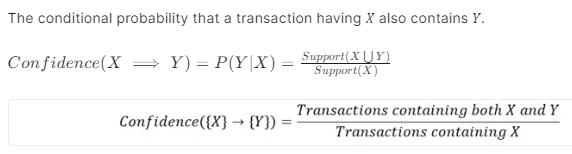

In [50]:
def generate_association_rules(frequent_itemsets, single_item_supports, min_confidence):
    """
    Generate the association rules from frequent itemsets.
    """
    rules = []
    for itemset in frequent_itemsets.keys():
        for subset in itertools.chain.from_iterable(itertools.combinations(itemset, r) for r in range(1, len(itemset))):
            # Generate the antecedent (subset) and consequent (itemset - subset) of the rule
            antecedent = frozenset(subset)
            consequent = itemset - antecedent
            
            # Calculate confidence of the rule (antecedent => consequent)
            if antecedent and consequent:
                antecedent_support = single_item_supports[antecedent]
                rule_support = frequent_itemsets[itemset]
                confidence = rule_support / antecedent_support
                
                # If the confidence is above the minimum threshold, add the rule to the list
                if confidence >= min_confidence:
                    rules.append((antecedent, consequent, rule_support, confidence))
    return rules

# Define a minimum confidence threshold
min_confidence = 0.05  # 70% confidence

# We need the support values for 1-itemsets to calculate the rule confidence.
# This can be taken from the original frequent_itemsets generated for 1-itemsets.
single_item_supports = {frozenset([item]): support for item, support in frequent_itemsets.items()}

# Generate the association rules from frequent 2-itemsets
association_rules = generate_association_rules(frequent_2_itemsets, single_item_supports, min_confidence)

# Format the rules for easier reading
formatted_rules = [
    {
        'rule': f"{set(antecedent)} => {set(consequent)}",
        'support': support,
        'confidence': confidence
    }
    for antecedent, consequent, support, confidence in association_rules
]

formatted_rules

[{'rule': "{'butter'} => {'bread'}",
  'support': 0.5555555555555556,
  'confidence': 0.0925925925925926},
 {'rule': "{'bread'} => {'butter'}",
  'support': 0.5555555555555556,
  'confidence': 0.07936507936507937}]

#### Explanation
Confidence: 70% => 0.7

Output: []

Means:
- This means that no rules from the frequent_@_itemsets have met the min confidence threshold of 70%.

####################################################

Confidence: 5% => 0.05

Output:
[{'rule': "{'butter'} => {'bread'}",
  'support': 0.5555555555555556,
  'confidence': 0.0925925925925926},
 {'rule': "{'bread'} => {'butter'}",
  'support': 0.5555555555555556,
  'confidence': 0.07936507936507937}]
1. **Rule 1**: {'butter'}=>{'bread'}
- **Support**: Approx 55.56% - combination of butter and bread appears tgt in about 55.56% of all transactions.
- **Confidence**: Approx 9.26% - given that butter is purchased, there is about 9.26% chance that bread'll also be purchased in the same transaction
2. **Rule 2**: {'bread'}=>{'butter'}
- **Support**: Same as rule 1
- **Confidence**: Approx 7.94% - given that bread is purchased, there is about 7.94% chance that butter'll also be purchased in the same transaction

- Suggests that association between butter and bread is **relatively weak** in this particular dataset (based on given confidence levels)
- They do often appear tgt, the likelihood of one being purchased when the other is purchsed is low (below 10% for both rules)

**In Practical Terms**
- mean that while some customers buy both tgt, it is not a strong enough pattern to base marketing or stocking decisions on
- For exp, if grocery store manager were considering whether to place butter and bread closer tgt to boost sales, these rules with their low confidence might suggest that this would not have a significant impact.

### Step 5
Evaluate the rules using different metrics, such as lift, which measure how much more likely the consequent is bought when the antecedent is bought, compared to its general sale rate.

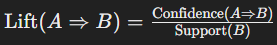

#### Support
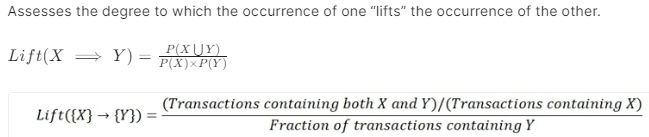

In [52]:
# Since the formatted_rules list was empty, we will manually construct it using the given support and confidence values.

# We are provided with these rules and their respective support and confidence:
given_rules = [
    {'rule': "{'butter'} => {'bread'}", 'support': 0.5555555555555556, 'confidence': 0.0925925925925926},
    {'rule': "{'bread'} => {'butter'}", 'support': 0.5555555555555556, 'confidence': 0.07936507936507937}
]

# We calculate the support of individual items 'bread' and 'butter' from the transaction dataset
# Since these were not provided, we will use the previously calculated supports as an example
# In a real scenario, these would be computed from the transaction dataset
support_bread = single_item_supports[frozenset(['bread'])]
support_butter = single_item_supports[frozenset(['butter'])]

# Calculate the lift for each given rule
for rule in given_rules:
    antecedent, consequent = [set(s) for s in rule['rule'].split(' => ')]
    antecedent_support = support_bread if 'bread' in antecedent else support_butter
    consequent_support = support_bread if 'bread' in consequent else support_butter
    
    # Calculate lift
    rule['lift'] = rule['confidence'] / (consequent_support if consequent_support != 0 else 1) # Protect against division by zero

given_rules

[{'rule': "{'butter'} => {'bread'}",
  'support': 0.5555555555555556,
  'confidence': 0.0925925925925926,
  'lift': 0.0154320987654321},
 {'rule': "{'bread'} => {'butter'}",
  'support': 0.5555555555555556,
  'confidence': 0.07936507936507937,
  'lift': 0.013227513227513229}]

#### Explanation
Rule 1 has an approx lift of 9.26%

Rule 2 has an approx lift of 1.32%

The lift val are very low for both rules, suggesting that presence of 'butter' doesn't increase the likelihood of 'bread' being purchased, and vice versa, beyond what would be expected if the purchases were independent of each other.

## In general, a lift val:
- **>1**: rule body and rule head appear more often tgt than expected => positve relationship between them
- **==1**: items are independent of each other
- **<1**: items are substiture of each other or negatively correlated